In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/landslide2.csv")
print(data.shape)

(111408, 10)


## data exploration

OBJECTID        int64
SLIDE_TYPE     object
SLOPE         float64
COVER          object
YEAR_1          int64
HEADELEV      float64
TAILELEV      float64
ELE_DIFF      float64
GULLY          object
CLASS          object
dtype: object

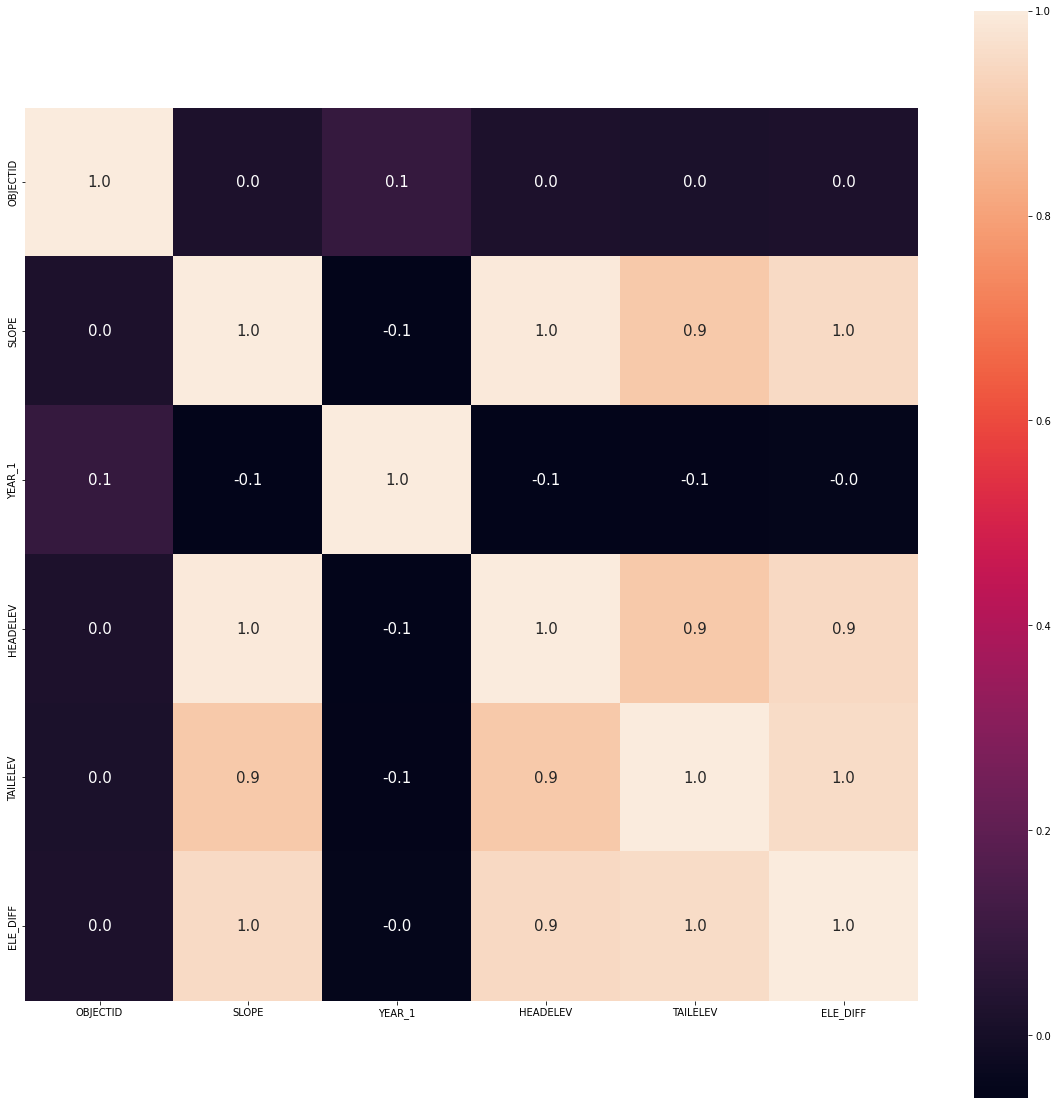

In [6]:
plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
data.head()
data.dtypes

## data process

In [7]:
#SLOPE, HEADELEV, TAILELEV, ELE_DIFF: delete 9999
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]

In [8]:
data1['history']=2022-data1['YEAR_1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data1.head()

,OBJECTID,SLIDE_TYPE,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,history
0,1,R,44.0,C,1964,136.0,127.0,9.0,N,A2,58
1,2,R,29.0,C,1964,122.0,113.0,9.0,N,C1,58
2,3,R,22.0,C,1964,48.0,39.0,9.0,N,A2,58
3,4,R,22.0,C,1964,53.0,42.0,11.0,N,C1,58
4,5,R,43.0,C,1964,97.0,87.0,10.0,N,B1,58


In [10]:
data1=data1.drop(['OBJECTID','YEAR_1'], axis=1)
data2 = pd.get_dummies(data1, columns=['COVER','GULLY','CLASS'])

In [11]:
data2['SLIDE_TYPE'].unique()

array(['R', 'C', 'O', 'S'], dtype=object)

In [12]:
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

In [13]:
data2

,SLIDE_TYPE,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y,CLASS_-,CLASS_A1,CLASS_A2,CLASS_B1,CLASS_B2,CLASS_C1,CLASS_C2,CLASS_S
0,0,44.0,136.0,127.0,9.0,58,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,29.0,122.0,113.0,9.0,58,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0,22.0,48.0,39.0,9.0,58,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,22.0,53.0,42.0,11.0,58,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,43.0,97.0,87.0,10.0,58,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111403,2,38.0,83.0,75.0,8.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0
111404,2,59.0,78.0,51.0,27.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0
111405,2,34.6,31.0,0.0,31.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0
111406,2,45.0,57.0,30.0,27.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


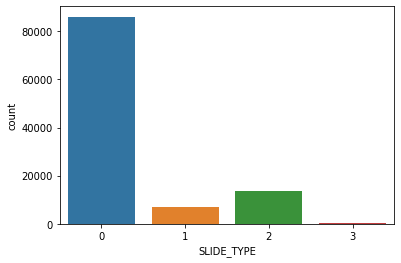

In [14]:
sns.countplot(data2['SLIDE_TYPE'] )

In [15]:
col= data2.columns[pd.np.r_[1:20]]
print(col)
#get x value
x = np.array(data2[col])
x.shape

Index(['SLOPE', 'HEADELEV', 'TAILELEV', 'ELE_DIFF', 'history', 'COVER_A',
       'COVER_B', 'COVER_C', 'COVER_D', 'GULLY_N', 'GULLY_Y', 'CLASS_-',
       'CLASS_A1', 'CLASS_A2', 'CLASS_B1', 'CLASS_B2', 'CLASS_C1', 'CLASS_C2',
       'CLASS_S'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


(107166, 19)

In [16]:
# get y value
y=np.array(data2['SLIDE_TYPE'])
y

array([0, 0, 0, ..., 2, 2, 2])

## Principal Component Analysis

### Data scaling

PCA requires scaling/normalization of the data to work properly

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx = pd.DataFrame(data=x,columns=data2.columns[1:])
dfx_pca = pca.fit(dfx)

### Plot the explained variance ratio 

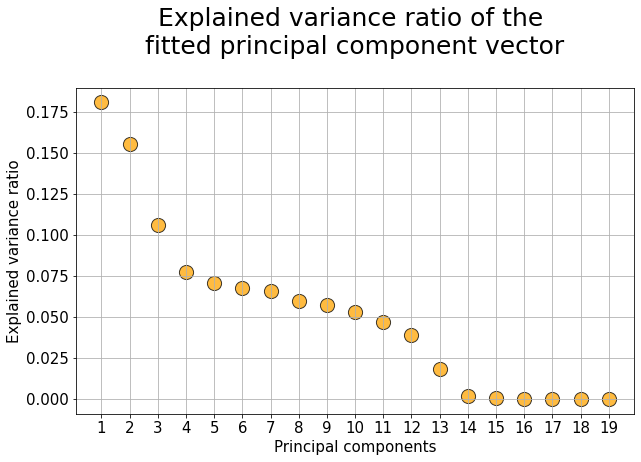

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

### Showing better class separation using principal components

In [20]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.026892,-0.212596,-0.222752,-1.365455,-0.800834,0.141175,-0.647937,0.905597,1.354559,-0.002598,-0.139170,-0.703614,-0.126411,0.011071,0.005182,-0.001784,-1.745512e-16,-1.468445e-17,-3.273021e-17
1,-0.976257,-0.253455,-0.069998,0.055215,0.744594,0.743676,-1.631749,-1.314402,-0.357099,-0.217837,0.387835,-0.384702,-0.125896,0.024881,-0.011570,0.004218,5.748493e-16,2.142990e-16,2.396214e-16
2,-0.979458,-0.346429,-0.202421,-1.461328,-0.405541,0.230544,-0.675573,0.992950,1.411672,-0.002706,-0.264920,-1.148005,-0.147972,0.014930,-0.023204,0.009635,-6.352889e-17,4.082670e-17,-8.824136e-17
3,-0.938337,-0.346698,-0.053813,-0.022670,1.064839,0.816151,-1.654051,-1.243783,-0.310771,-0.218160,0.286029,-0.744275,-0.143428,0.028140,-0.023034,0.008956,5.748493e-16,2.698102e-16,2.118658e-16
4,-1.013107,-0.270286,-0.120468,-0.424798,1.089825,-1.438363,0.869569,-0.387200,0.019181,-0.118347,0.169678,-0.555271,-0.104691,0.022055,0.003411,-0.001075,-6.352889e-17,1.518490e-16,-4.247777e-16
5,-0.944002,-0.318980,-0.056275,-0.012396,1.021720,0.806475,-1.650943,-1.253443,-0.316934,-0.218387,0.299786,-0.695417,-0.141140,0.027954,0.000468,-0.000333,5.748493e-16,2.420546e-16,2.118658e-16
6,-0.987384,-0.336278,-0.109459,-0.477467,1.306560,-1.389321,0.854472,-0.339380,0.050535,-0.118547,0.100750,-0.798710,-0.116550,0.024322,0.001010,-0.000007,-6.352889e-17,1.518490e-16,-4.525333e-16
7,-0.988978,-0.333481,-0.110153,-0.473996,1.292358,-1.392549,0.855439,-0.342497,0.048462,-0.118482,0.105275,-0.782801,-0.115760,0.024066,-0.008165,0.003621,-6.352889e-17,1.518490e-16,-4.525333e-16
8,-0.988072,-0.301388,-0.206216,-1.445792,-0.470933,0.215870,-0.670869,0.978273,1.402313,-0.003043,-0.244013,-1.073816,-0.144503,0.014492,-0.001044,0.000912,-6.352889e-17,1.307113e-17,-8.824136e-17
9,-0.998542,-0.283957,-0.210641,-1.423547,-0.561871,0.195247,-0.664587,0.958309,1.389124,-0.002814,-0.215147,-0.971978,-0.139486,0.013498,-0.003743,0.001891,-6.352889e-17,1.307113e-17,-6.048578e-17


Plot the first two columns of this transformed data set with the color set to original ground truth class label

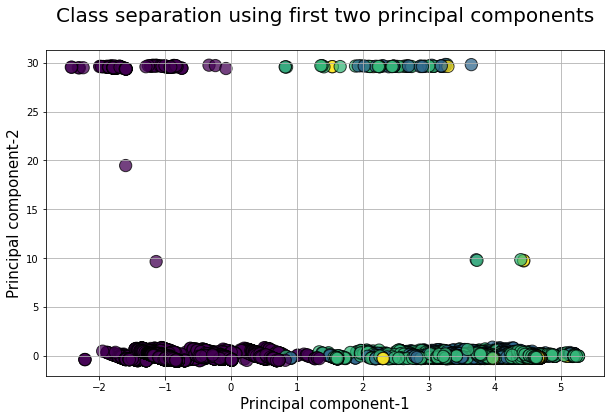

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=data2['SLIDE_TYPE'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
#ax.legend(fontsize =16)
plt.show()

## Data prepare

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)

# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##  1. k-Nearest Neighbor

In [ ]:
model = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9451850383500122
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights).fit(X_train, y_train.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

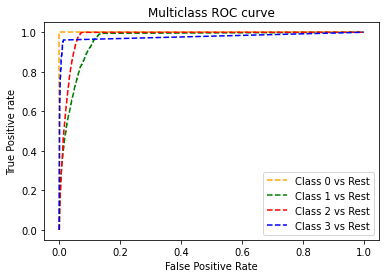

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [ ]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

In [ ]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)

k Nearest Neighbors:
Accuracy: 0.944945567651633


Confusion Matrix:


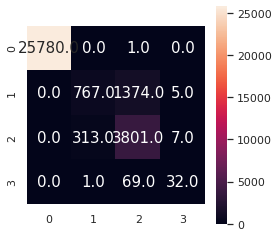

In [ ]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [ ]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 1.0000 
Recall on Y label = 1.0000 
F1 on Y label = 1.0000 
----------------------------
1
Precision  = 0.7095 
Recall on Y label = 0.3574 
F1 on Y label = 0.4754 
----------------------------
2
Precision  = 0.7247 
Recall on Y label = 0.9223 
F1 on Y label = 0.8117 
----------------------------
3
Precision  = 0.7273 
Recall on Y label = 0.3137 
F1 on Y label = 0.4384 
----------------------------


## 2. Random Forest

In [ ]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9512104137423648
Best hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train,y_train.ravel())

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

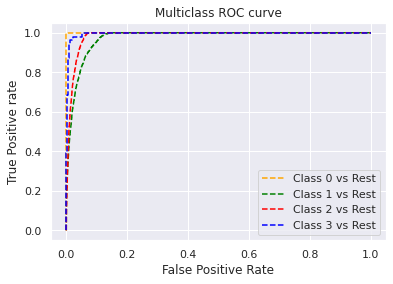

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [ ]:
rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1,2,3])

In [ ]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print('k Nearest Neighbors:')
print('Accuracy:',rf_acc)

k Nearest Neighbors:
Accuracy: 0.9519129082426128


Confusion Matrix:


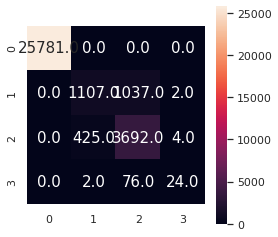

In [ ]:
array = confusion_matrix(y_test, rf_pred)

rf_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(rf_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [ ]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (rf_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (rf_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (rf_cls_f1[i]))
    print('----------------------------')

0
Precision  = 1.0000 
Recall on Y label = 1.0000 
F1 on Y label = 1.0000 
----------------------------
1
Precision  = 0.7216 
Recall on Y label = 0.5158 
F1 on Y label = 0.6016 
----------------------------
2
Precision  = 0.7684 
Recall on Y label = 0.8959 
F1 on Y label = 0.8272 
----------------------------
3
Precision  = 0.8000 
Recall on Y label = 0.2353 
F1 on Y label = 0.3636 
----------------------------


# decision tree

In [23]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,40,5),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9469712917809222
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


In [24]:
dt = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

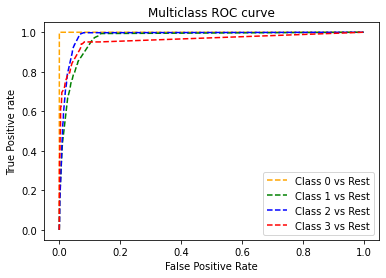

In [27]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dt_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [28]:
dt_conf_mat = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree:')
print('Accuracy:',dt_acc)

Decision Tree:
Accuracy: 0.949891135303266


Decision Tree Confusion Matrix:


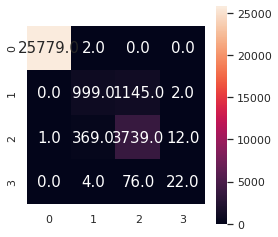

In [31]:
array = confusion_matrix(y_test, dt_pred)

dt_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(dt_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Decision Tree Confusion Matrix:')
plt.show()

# Logistic Regression


In [32]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Best score: 0.9481977300443226
Best hyperparameters: {'C': 1000.0}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [33]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [34]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

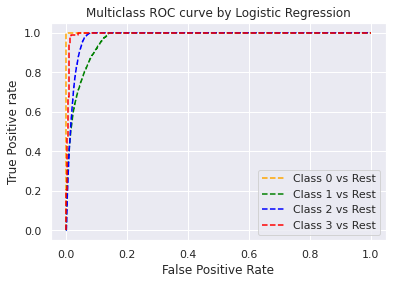

In [35]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, lr_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve by Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [36]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression:')
print('Accuracy:',lr_acc)

Logistic Regression:
Accuracy: 0.9496734059097979


Logistic Regression:


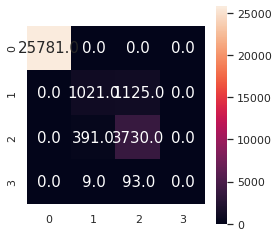

In [37]:
array = confusion_matrix(y_test, lr_pred)

lr_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(lr_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Logistic Regression:')
plt.show()

# CNN

In [38]:
model = Sequential()
model.add(Dense(80, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [39]:
history=model.fit(X_train, y_train,epochs=500)

Epoch 1/500
2345/2345 [==============================] - 10s 4ms/step - loss: -2.0022 - accuracy: 0.8676
Epoch 2/500
2345/2345 [==============================] - 7s 3ms/step - loss: -2.0455 - accuracy: 0.8683
Epoch 3/500
2345/2345 [==============================] - 6s 3ms/step - loss: -2.0512 - accuracy: 0.8686
Epoch 4/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0498 - accuracy: 0.8686
Epoch 5/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0513 - accuracy: 0.8687
Epoch 6/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0505 - accuracy: 0.8686
Epoch 7/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0513 - accuracy: 0.8687
Epoch 8/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0513 - accuracy: 0.8687
Epoch 9/500
2345/2345 [==============================] - 4s 2ms/step - loss: -2.0513 - accuracy: 0.8687
Epoch 10/500
2345/2345 [==============================] - 4s 2m

In [40]:
model.test_on_batch(X_test, y_test)

[-2.0514142513275146, 0.8686469793319702]

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [44]:
results = model.evaluate(X_test, y_test, batch_size=128)

252/252 [==============================] - 1s 3ms/step - loss: -2.0514 - accuracy: 0.8686
